Links:

- https://deepayan137.github.io/blog/markdown/2020/08/29/building-ocr.html


# NLP + OCR

## Goal One: Developing an OCR Model for Baybayin

- **Objective:** Create a robust Optical Character Recognition (OCR) model capable of accurately recognizing and transcribing Baybayin script from images.
- **Approach:** Utilize deep learning techniques, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), to develop and train the OCR model on a comprehensive dataset of Baybayin script images. Evaluate the mode's performance using the standard metrics and fine0tune it to achieve high accuracy and reliability.

## Goal Two: Generating Baybayin for a Tagalog Word

- **Objective:** To develop a machine learning model that can automatically generate the Baybayin script representation for any given Tagalog word or name.
- **Approach:** Implement a sequence-to-sequence model, such as an encoder-decoder architecture with attention mechanisms, to learn the mapping between Tagalog words and their corresponding Baybayin script. Train the model on a parallel corpus of Tagalog words and their Baybayin translations, and evaluate its performance using appropriate metrics. Fine-tune the model to ensure accurate and contextually appropriate script generation.


In [2]:
DEFAULT_LEARNING_RATE = 0.0001
DEFAULT_NUM_EPOCHS = 20
DEFAULT_BATCH_SIZE = 128
DEFAULT_ROOT_DIR = 'all'
DEFAULT_NUM_CLASSES = 2350
DEFAULT_USE_MODEL = 'vgg19'

# 60-min Torch Notes


In [3]:
# Import libraries
import torch 
import numpy as np

In [10]:
# Link: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html
# Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

# Create a tensor: matrix is 2x2. Columns are [1, 3] and [2, 4]. Rows are [1, 2] and [3, 4]
# Why Use Tensors? Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

# The double brackets in the data variable are due to a trailing comma, which inadvertently creates a tuple containing a list. This results in an extra dimension when the tensor is created.
data = [[1, 2], 
        [3, 4]]
x_data = torch.tensor(data)

# From a numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)


x_ones = torch.ones_like(x_data) # retains the properties of x_data (shape, datatype)
print(f"Ones Tensor: \n {x_ones} \n")


# With random or constant values:
# shape is a tuple of tensor dimensions. In the function below, it is a single value.
# first argument is the shape of the tensor. In this case, we are creating a 2x3 tensor.
shape = (2,5,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")


# Attributes of a Tensor
print(f"Shape of tensor: {rand_tensor.shape}")
print(f"Datatype of tensor: {rand_tensor.dtype}")
print(f"Device tensor is stored on: {rand_tensor.device}")


# # We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = rand_tensor.to("cuda")
    print(f"Tensor is now stored on: {tensor.device}")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4310, 0.3855, 0.4345, 0.8169, 0.4850],
        [0.7703, 0.0797, 0.5625, 0.1235, 0.6256]]) 

Shape of tensor: torch.Size([2, 5])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [5]:
# For Datasets 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# For Classes 
import os
import pandas as pd
import torchvision
from torchvision.io import read_image

In [6]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

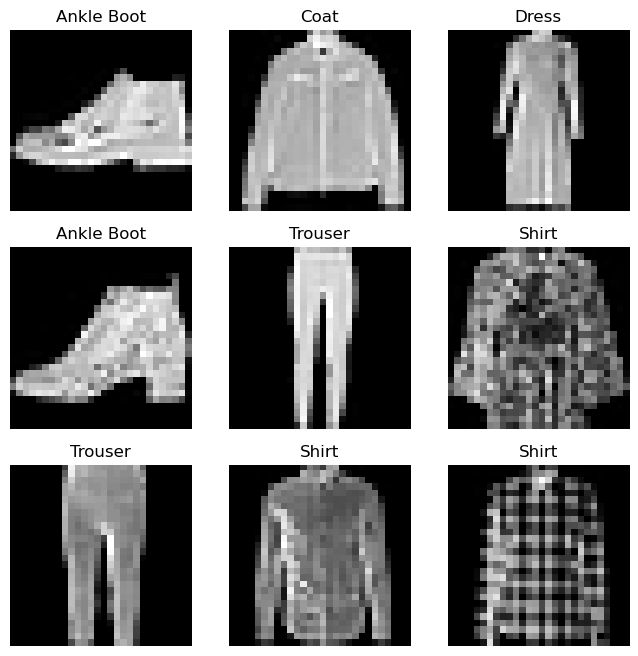

In [7]:
labels_map = { 
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover", 
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3 # 9 labels

for i in range(1, cols*rows+1): 
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]

    # `add_subplot(rows, cols, i)` adds a subplot to the figure in a grid layout with rows rows and cols columns. The i specifies the position of the subplot.
    figure.add_subplot(rows, cols, i)

    # `plt.title()` sets the title of the subplot. The title is the label name.
    plt.title(labels_map[label])

    # plt.axis("off") hides the axis lines and labels for a cleaner look.
    plt.axis("off")

    # `plt.imshow(img.squeeze(), cmap="gray")` displays the image in grayscale. `img.squeeze()` removes any unnecessary dimensions from the image tensor.
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()
